### Machine Learning with Big Data
## Part 1: Fully Connected Layers

# 0.4 - evaluate best model

**Group:** MLBD_Deventer 4
**Students:** Mathijs Pattipeilohy (512391), Emin Fikret (511275)

if you run the model you will see that it follows as much of a diagonal line as possible. the test data just has a lot more nothing and one pairs so there will also be more errors in that but compared to how much it gets correctly its still very accurate

2025-10-26 15:11:41.900347: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-26 15:11:42.003359: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 4070 Laptop GPU, compute capability 8.9


2025-10-26 15:11:43.189514: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-26 15:11:43.203255: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-26 15:11:43.205067: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-26 15:11:43.206967: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-26 15:11:43.214110: I tensorflow/core/platform/cpu_feature_g

final test accuracy 0.9785224199295044


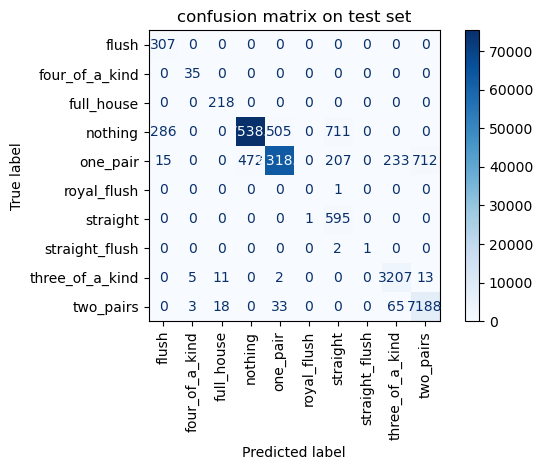

In [1]:
# step 4 evaluate and show confusion matrix

# keep comments simple and lowercase no punctuation

import os
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow import keras
import pandas as pd

# load meta and model
with open('../artifacts/metadata.json') as f:
    meta = json.load(f)
labels = meta['label_classes']
num_classes = len(labels)
model = keras.models.load_model('../artifacts/best_so_far.keras')

# load test
X_test = np.load('../artifacts/X_test.npy')
y_test = np.load('../artifacts/y_test.npy')

# one hot labels
y_test_oh = keras.utils.to_categorical(y_test, num_classes)

# eval
loss, acc = model.evaluate(X_test, y_test_oh, batch_size=1024, verbose=0)
print('final test accuracy', acc)

# confusion matrix save and show
y_pred = model.predict(X_test, batch_size=4096, verbose=0).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot(xticks_rotation=90, cmap='Blues')
plt.title('confusion matrix on test set')
os.makedirs('../artifacts', exist_ok=True)
plt.tight_layout()
plt.savefig('../artifacts/test_confusion_matrix.png', dpi=150)
plt.show()
